In [61]:
from random import random, randint
import matplotlib.pyplot as plt
%matplotlib inline

sgn = lambda x: -1 if x < 0 else (1 if x > 0 else 0)

def step_actor_action(value, threshold, previous_action):
    if abs(value) <= threshold:
        return previous_action
    else:
        return -1 * sgn(value)

def step_population_action(value, actors):
    total_action = 0
    for actor in actors:
        action = step_actor_action(value, actor['threshold'], actor['previous_action'])
        actor['previous_action'] = action
        total_action += action
    return total_action

def step_model_action(value, actors):
    action = step_population_action(value, actors) / len(actors)
    # get rid of the division by len(actors) to reproduce book's results
    random_action = -1 if random() < 0.5 else 1
    return action + random_action

def first_step_model(actors):
    total_action = 0
    for actor in actors:
        action = -1 if random() < 0.5 else 1
        actor['previous_action'] = action
        total_action += action
    return total_action

def run_model(actors, num_steps):
    value = first_step_model(actors)
    values = [value]
    for i in range(num_steps):
        value += step_model_action(value, actors)
        values.append(value)
    return values

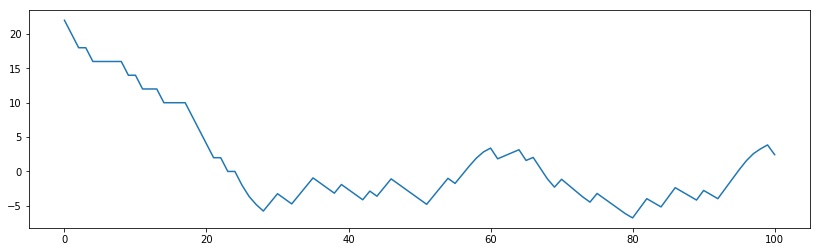

In [62]:
actors = []
for i in range(100):
    actor = {}
    actor['threshold'] = randint(0, 10)
    actors.append(actor)

plt.figure(figsize=(14, 4))
plt.plot(run_model(actors, 100))

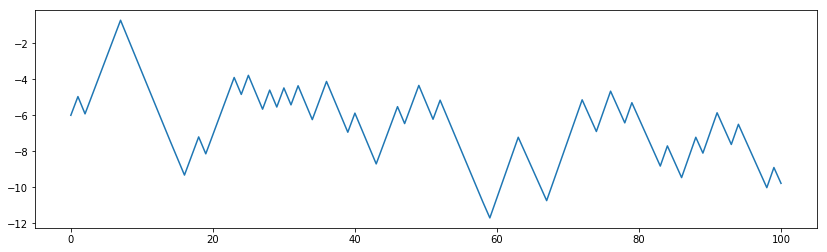

In [56]:
actors = []
for i in range(100):
    actor = {}
    actor['threshold'] = randint(0, 60)
    actors.append(actor)

plt.figure(figsize=(14, 4))
plt.plot(run_model(actors, 100))

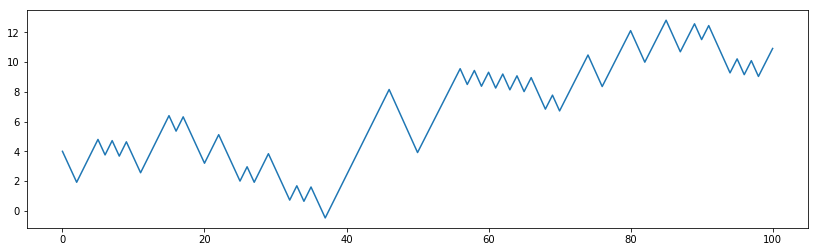

In [57]:
actors = []
for i in range(100):
    actor = {}
    actor['threshold'] = randint(0, 100)
    actors.append(actor)

plt.figure(figsize=(14, 4))
plt.plot(run_model(actors, 100))